### __Feature Selection__

In [1]:
# import libraries
import numpy as np
import pandas as pd
import random
import io
import requests
from datetime import datetime, timezone, timedelta
import datetime as dt
import time
from collections import Counter

# import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# import seaborn
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# import category encoders
#import category_encoders as ce

import statsmodels.api as sm

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import sklearn.model_selection as model_selection
import sklearn.model_selection as cross_validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import average_precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix
from sklearn.feature_selection import RFE
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier

#for showing 2D plot
%matplotlib inline 

# to be able to see multiple ouputs from sungle cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [93]:
# import work_df2
work_df2 = pd.read_csv('work_df2_featur_eng.csv')
work_df2.info()
work_df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 53 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   520681 non-null  int64  
 1   month                  520681 non-null  int64  
 2   day_of_week            520681 non-null  int64  
 3   mkt_carrier_fl_num     520681 non-null  int64  
 4   tail_num               520681 non-null  int64  
 5   op_carrier_fl_num      520681 non-null  int64  
 6   origin                 520681 non-null  int64  
 7   origin_city            520681 non-null  int64  
 8   dest                   520681 non-null  int64  
 9   dest_city              520681 non-null  int64  
 10  crs_elapsed_time       520681 non-null  float64
 11  flights                520681 non-null  float64
 12  distance               520681 non-null  float64
 13  mkt_unique_carrier_AA  520681 non-null  int64  
 14  mkt_unique_carrier_AS  520681 non-nu

,year,month,day_of_week,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin,origin_city,dest,dest_city,...,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,target_class
0,2019,5,2,4593,3,4593,2,2,4,5,...,0,0,0,0,0,0,0,1,0,1
1,2019,5,2,4648,3,4648,1,1,5,5,...,0,0,0,0,0,0,0,1,0,1
2,2019,5,2,32,2,32,5,5,5,5,...,0,0,0,0,0,0,0,0,0,1
3,2019,5,2,327,1,327,5,4,3,3,...,0,0,0,0,0,0,0,0,0,1
4,2019,5,2,517,3,517,2,2,5,5,...,0,0,0,0,0,0,0,0,0,1


#### __Feature Selection - 2nd Step__

#### __A. RFE Run with non-scaled data__
> - work_df2

In [2]:
# import work_df2 to csv
work_df2 = pd.read_csv('work_df2_featur_engv2.csv')

work_df2.info()
work_df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   520681 non-null  int64  
 1   month                  520681 non-null  int64  
 2   day_of_week            520681 non-null  int64  
 3   mkt_carrier_fl_num     520681 non-null  int64  
 4   tail_num               520681 non-null  int64  
 5   origin                 520681 non-null  int64  
 6   origin_city            520681 non-null  int64  
 7   dest                   520681 non-null  int64  
 8   dest_city              520681 non-null  int64  
 9   crs_elapsed_time       520681 non-null  float64
 10  flights                520681 non-null  float64
 11  distance               520681 non-null  float64
 12  mkt_unique_carrier_AA  520681 non-null  int64  
 13  mkt_unique_carrier_AS  520681 non-null  int64  
 14  mkt_unique_carrier_B6  520681 non-nu

,year,month,day_of_week,mkt_carrier_fl_num,tail_num,origin,origin_city,dest,dest_city,crs_elapsed_time,...,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,target_class
0,2019,5,2,4593,3,2,2,4,5,169.0,...,0,0,0,0,0,0,0,1,0,1
1,2019,5,2,4648,3,1,1,5,5,144.0,...,0,0,0,0,0,0,0,1,0,1
2,2019,5,2,32,2,5,5,5,5,134.0,...,0,0,0,0,0,0,0,0,0,1
3,2019,5,2,327,1,5,4,3,3,296.0,...,0,0,0,0,0,0,0,0,0,1
4,2019,5,2,517,3,2,2,5,5,85.0,...,0,0,0,0,0,0,0,0,0,1


##### __Estimator: Decision Tree__

In [102]:
# start time to measure the time of the program execution
start_time = time.time()

# Feature Selections through RFE
# from sklearn.feature_selection import RFE

# define X & y
X = work_df2.iloc[:, :51].values
y = work_df2.iloc[:, 51].values

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=30)

# fit RFE
rfe.fit(X, y)

# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=30)

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 21.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected False, Rank: 9.000
Column: 18, Selected False, Rank: 16.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected False, Rank: 20.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected False, Rank: 5.000
Column: 24, Selected False, Rank: 22.000
Column: 25, Selected True

##### __Estimator: Logistic Regression__

In [ ]:
# start time to measure the time of the program execution
start_time = time.time()

# Feature Selections through RFE
# from sklearn.feature_selection import RFE

# define RFE
rfe2 = RFE(estimator=LogisticRegression(), n_features_to_select=30)

# fit RFE
rfe2.fit(X, y)

# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe2.support_[i], rfe2.ranking_[i]))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

RFE(estimator=LogisticRegression(), n_features_to_select=30)

Column: 0, Selected False, Rank: 17.000
Column: 1, Selected False, Rank: 12.000
Column: 2, Selected False, Rank: 10.000
Column: 3, Selected False, Rank: 20.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 4.000
Column: 7, Selected False, Rank: 2.000
Column: 8, Selected False, Rank: 9.000
Column: 9, Selected False, Rank: 13.000
Column: 10, Selected False, Rank: 22.000
Column: 11, Selected False, Rank: 14.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected False, Rank: 16.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected False, Rank: 5.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected False, Rank: 19.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected False, Rank: 18.000
Column: 25,

#### __B. RFE Run with scaled data__
> - work_df3

In [2]:

work_df3 = pd.read_csv('work_df3_scaledfeatur_eng.csv')
work_df3.info()
work_df3.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   520681 non-null  int64  
 1   month                  520681 non-null  int64  
 2   day_of_week            520681 non-null  int64  
 3   mkt_carrier_fl_num     520681 non-null  float64
 4   tail_num               520681 non-null  int64  
 5   origin                 520681 non-null  int64  
 6   origin_city            520681 non-null  int64  
 7   dest                   520681 non-null  int64  
 8   dest_city              520681 non-null  int64  
 9   crs_elapsed_time       520681 non-null  float64
 10  flights                520681 non-null  float64
 11  distance               520681 non-null  float64
 12  mkt_unique_carrier_AA  520681 non-null  int64  
 13  mkt_unique_carrier_AS  520681 non-null  int64  
 14  mkt_unique_carrier_B6  520681 non-nu

,year,month,day_of_week,mkt_carrier_fl_num,tail_num,origin,origin_city,dest,dest_city,crs_elapsed_time,...,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,target_class
0,2019,5,2,1.007068,3,2,2,4,5,0.425950,...,0,0,0,0,0,0,0,1,0,1
1,2019,5,2,1.036667,3,1,1,5,5,0.077483,...,0,0,0,0,0,0,0,1,0,1
2,2019,5,2,-1.447481,2,5,5,5,5,-0.061903,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# start time to measure the time of the program execution
start_time = time.time()

# Feature Selections through RFE
# from sklearn.feature_selection import RFE

# define X & y
X1 = work_df3.iloc[:, :51].values
y1 = work_df3.iloc[:, 51].values

# define RFE
rfe3 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=30)

# fit RFE
rfe3.fit(X1, y1)

# summarize all features
for i in range(X1.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe3.support_[i], rfe3.ranking_[i]))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=30)

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 21.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected False, Rank: 14.000
Column: 18, Selected False, Rank: 16.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected False, Rank: 19.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected False, Rank: 5.000
Column: 24, Selected False, Rank: 22.000
Column: 25, Selected Tru

In [ ]:
# start time to measure the time of the program execution
start_time = time.time()

# Feature Selections through RFE
# from sklearn.feature_selection import RFE

# define RFE
rfe4 = RFE(estimator=LogisticRegression(), n_features_to_select=30)

# fit RFE
rfe4.fit(X1, y1)

# summarize all features
for i in range(X1.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe4.support_[i], rfe4.ranking_[i]))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

RFE(estimator=LogisticRegression(), n_features_to_select=30)

Column: 0, Selected False, Rank: 19.000
Column: 1, Selected False, Rank: 17.000
Column: 2, Selected False, Rank: 16.000
Column: 3, Selected False, Rank: 10.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 5.000
Column: 7, Selected False, Rank: 4.000
Column: 8, Selected False, Rank: 15.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 22.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 8.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected False, Rank: 11.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected False, Rank: 3.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected False, Rank: 18.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected False, Rank: 20.000
Column: 25, S

#### __Random Forest Feature Importance__

RandomForestClassifier(random_state=0)

mkt_carrier_fl_num       0.228920
crs_elapsed_time         0.202060
distance                 0.153961
month                    0.125429
day_of_week              0.104627
tail_num                 0.036524
dest                     0.025939
dest_city                0.025735
year                     0.020199
origin                   0.019559
origin_city              0.019387
mkt_unique_carrier_DL    0.003031
op_unique_carrier_OO     0.002791
mkt_unique_carrier_AA    0.002102
mkt_unique_carrier_UA    0.002064
op_unique_carrier_YX     0.001973
op_unique_carrier_DL     0.001837
op_unique_carrier_AA     0.001472
op_unique_carrier_UA     0.001391
mkt_unique_carrier_WN    0.001356
op_unique_carrier_WN     0.001356
mkt_unique_carrier_AS    0.001326
op_unique_carrier_MQ     0.001318
op_unique_carrier_EV     0.001275
op_unique_carrier_YV     0.001142
op_unique_carrier_OH     0.001065
op_unique_carrier_AS     0.000901
op_unique_carrier_G7     0.000884
op_unique_carrier_9E     0.000873
op_unique_carr

<Figure size 1200x960 with 0 Axes>

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

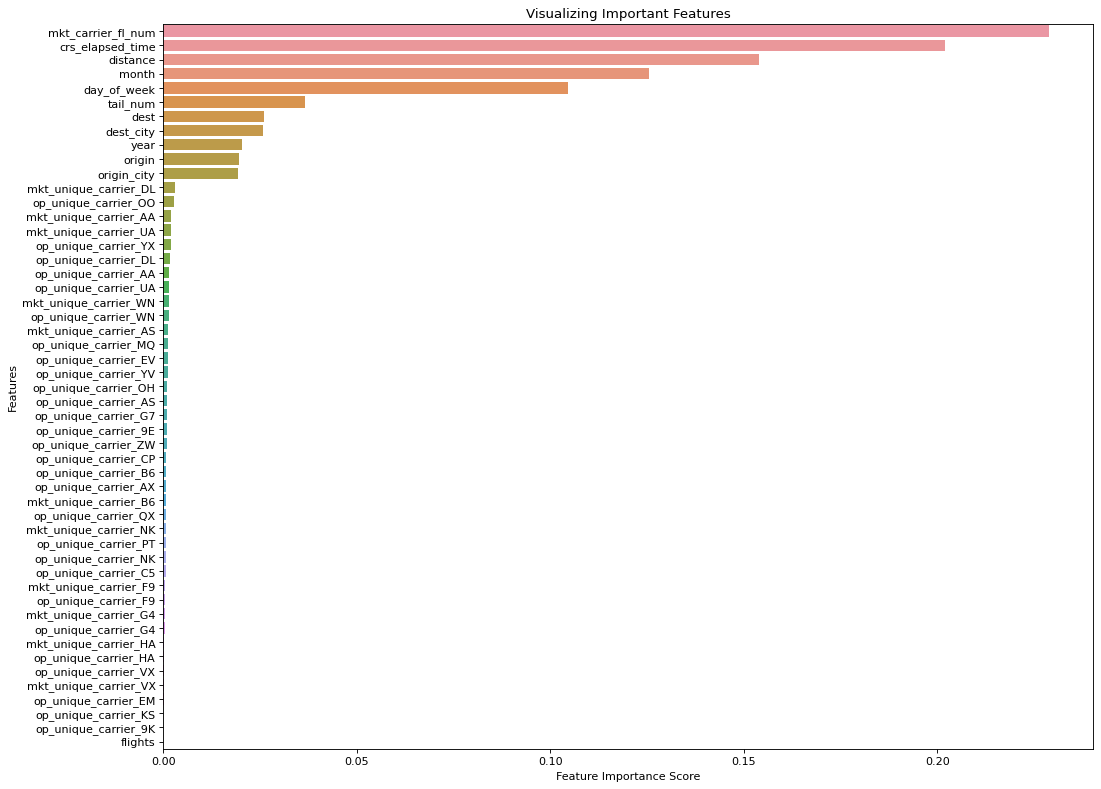



--- 87.53596067428589 seconds ---


In [ ]:
# start time to measure the time of the program execution
start_time = time.time()

# Assign X & y
X2 = work_df3.iloc[:, :51]
y2 = work_df3.iloc[:, 51]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.20, random_state = 42)

# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, 
                           index=X_train.columns).sort_values(ascending=False)

feature_scores

# Creating a seaborn bar plot
figure(figsize=(15, 12), dpi=80)
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

In [4]:
# Assign X & y
X2 = work_df3.iloc[:, :51]
y2 = work_df3.iloc[:, 51]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.20, random_state = 42)

In [5]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

RandomForestClassifier()



--- 131.44773626327515 seconds ---


In [6]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Logistic Regression Model
lg = LogisticRegression(random_state=0)
lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

LogisticRegression(random_state=0)



--- 13.327927112579346 seconds ---


In [7]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Guasian Naive Bays Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

GaussianNB()



--- 0.6484878063201904 seconds ---


In [8]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

DecisionTreeClassifier()



--- 8.836459636688232 seconds ---


In [9]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Stochastic Gradient Classifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

SGDClassifier()



--- 110.03159952163696 seconds ---


In [10]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

XGBClassifier()



--- 70.33800220489502 seconds ---


In [13]:
# function for performance metrics - scores
def classification_metrics(y_test, y_pred_rf, y_pred_lg, y_pred_gnb, 
                           y_pred_dt, y_pred_sgd, y_pred_xgb):
    
  rf_accuracy = accuracy_score(y_test, y_pred_rf)
  rf_f1 = f1_score(y_test, y_pred_rf, average='micro')
  rf_precision = precision_score(y_test, y_pred_rf, average='micro')
  rf_recall = recall_score(y_test, y_pred_rf, average='micro')

  lg_accuracy = accuracy_score(y_test, y_pred_lg)
  lg_f1 = f1_score(y_test, y_pred_lg, average='micro')
  lg_precision = precision_score(y_test, y_pred_lg, average='micro')
  lg_recall = recall_score(y_test, y_pred_lg, average='micro')

  gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
  gnb_f1 = f1_score(y_test, y_pred_gnb, average='micro')
  gnb_precision = precision_score(y_test, y_pred_gnb, average='micro')
  gnb_recall = recall_score(y_test, y_pred_gnb, average='micro')

  dt_accuracy = accuracy_score(y_test, y_pred_dt)
  dt_f1 = f1_score(y_test, y_pred_dt, average='micro')
  dt_precision = precision_score(y_test, y_pred_dt, average='micro')
  dt_recall = recall_score(y_test, y_pred_dt, average='micro')

  sgd_accuracy = accuracy_score(y_test, y_pred_sgd)
  sgd_f1 = f1_score(y_test, y_pred_sgd, average='micro')
  sgd_precision = precision_score(y_test, y_pred_sgd, average='micro')
  sgd_recall = recall_score(y_test, y_pred_sgd, average='micro')

  xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
  xgb_f1 = f1_score(y_test, y_pred_xgb, average='micro')
  xgb_precision = precision_score(y_test, y_pred_xgb, average='micro')
  xgb_recall = recall_score(y_test, y_pred_xgb, average='micro')

  df_cl_metrics = pd.DataFrame({'RF': [rf_accuracy, rf_f1, rf_precision, rf_recall],
                                'LogisticR': [lg_accuracy, lg_f1, lg_precision, lg_recall],
                                'GNB': [gnb_accuracy, gnb_f1, gnb_precision, gnb_recall],
                                'DecisionT': [dt_accuracy, dt_f1, dt_precision, dt_recall],
                                'SGD': [sgd_accuracy, sgd_f1, sgd_precision, sgd_recall],
                                'XGB': [xgb_accuracy, xgb_f1, xgb_precision, xgb_recall]
                                }, index=['accuracy', 'f1_score', 'precision', 'recall'])

  return df_cl_metrics

In [14]:
# start time to measure the time of the program execution
start_time = time.time()

classification_metrics(y_test, y_pred_rf, y_pred_lg, y_pred_gnb, 
                           y_pred_dt, y_pred_sgd, y_pred_xgb)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,RF,LogisticR,GNB,DecisionT,SGD,XGB
accuracy,0.558197,0.536159,0.525279,0.531483,0.518778,0.558985
f1_score,0.558197,0.536159,0.525279,0.531483,0.518778,0.558985
precision,0.558197,0.536159,0.525279,0.531483,0.518778,0.558985
recall,0.558197,0.536159,0.525279,0.531483,0.518778,0.558985




--- 1.548966646194458 seconds ---


#### __RFE and Random Forest Feature Importance Run with Feature Selection__

In [3]:
remove_lower_features = ['flights', 'mkt_unique_carrier_HA', 'op_unique_carrier_9K',
                         'op_unique_carrier_G4','op_unique_carrier_PT','op_unique_carrier_YV']

work_df3_1 = work_df3.drop(remove_lower_features, axis=1)

# check
work_df3_1.info()
work_df3_1.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   520681 non-null  int64  
 1   month                  520681 non-null  int64  
 2   day_of_week            520681 non-null  int64  
 3   mkt_carrier_fl_num     520681 non-null  float64
 4   tail_num               520681 non-null  int64  
 5   origin                 520681 non-null  int64  
 6   origin_city            520681 non-null  int64  
 7   dest                   520681 non-null  int64  
 8   dest_city              520681 non-null  int64  
 9   crs_elapsed_time       520681 non-null  float64
 10  distance               520681 non-null  float64
 11  mkt_unique_carrier_AA  520681 non-null  int64  
 12  mkt_unique_carrier_AS  520681 non-null  int64  
 13  mkt_unique_carrier_B6  520681 non-null  int64  
 14  mkt_unique_carrier_DL  520681 non-nu

,year,month,day_of_week,mkt_carrier_fl_num,tail_num,origin,origin_city,dest,dest_city,crs_elapsed_time,...,op_unique_carrier_NK,op_unique_carrier_OH,op_unique_carrier_OO,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YX,op_unique_carrier_ZW,target_class
0,2019,5,2,1.007068,3,2,2,4,5,0.425950,...,0,0,0,0,0,0,0,1,0,1
1,2019,5,2,1.036667,3,1,1,5,5,0.077483,...,0,0,0,0,0,0,0,1,0,1
2,2019,5,2,-1.447481,2,5,5,5,5,-0.061903,...,0,0,0,0,0,0,0,0,0,1


In [4]:
# Assign X & y
X2_1 = work_df3_1.iloc[:, :45]
y2_1 = work_df3_1.iloc[:, 45]

# split data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2_1, y2_1, test_size = 0.20, random_state = 42)

In [6]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Random Forest Model
rf3 = RandomForestClassifier()
rf3.fit(X_train3, y_train3)
y_pred_rf3 = rf3.predict(X_test3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

RandomForestClassifier()



--- 183.69111156463623 seconds ---


In [7]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Logistic Regression Model
lg3 = LogisticRegression(random_state=0)
lg3.fit(X_train3, y_train3)
y_pred_lg3 = lg3.predict(X_test3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

LogisticRegression(random_state=0)



--- 37.622002840042114 seconds ---


In [8]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Guasian Naive Bays Model
gnb3 = GaussianNB()
gnb3.fit(X_train3, y_train3)
y_pred_gnb3 = gnb3.predict(X_test3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

GaussianNB()



--- 0.8630120754241943 seconds ---


In [9]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Decision Tree
dt3 = DecisionTreeClassifier()
dt3.fit(X_train3, y_train3)
y_pred_dt3 = dt3.predict(X_test3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

DecisionTreeClassifier()



--- 12.701311588287354 seconds ---


In [10]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Stochastic Gradient Classifier
sgd3 = SGDClassifier()
sgd3.fit(X_train3, y_train3)
y_pred_sgd3 = sgd3.predict(X_test3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

SGDClassifier()



--- 91.3164701461792 seconds ---


In [11]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit XGBoost Classifier
xgb3 = XGBClassifier()
xgb3.fit(X_train3, y_train3)
y_pred_xgb3 = xgb3.predict(X_test3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[12:59:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)



--- 78.42545056343079 seconds ---


In [14]:
# start time to measure the time of the program execution
start_time = time.time()

classification_metrics(y_test3, y_pred_rf3, y_pred_lg3, y_pred_gnb3, 
                           y_pred_dt3, y_pred_sgd3, y_pred_xgb3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,RF,LogisticR,GNB,DecisionT,SGD,XGB
accuracy,0.560377,0.536034,0.524482,0.531886,0.521429,0.573648
f1_score,0.560377,0.536034,0.524482,0.531886,0.521429,0.573648
precision,0.560377,0.536034,0.524482,0.531886,0.521429,0.573648
recall,0.560377,0.536034,0.524482,0.531886,0.521429,0.573648




--- 1.2183010578155518 seconds ---


#### __Repeat the Feature Selection Processes above on No_Dummary version__

In [16]:
scaled_no_dummy = pd.read_csv('scaled_no_dummy_featur_eng.csv')


In [21]:
scaled_no_dummy.info()
scaled_no_dummy.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                520681 non-null  int64  
 1   month               520681 non-null  int64  
 2   day_of_week         520681 non-null  int64  
 3   mkt_unique_carrier  520681 non-null  int64  
 4   mkt_carrier_fl_num  520681 non-null  float64
 5   op_unique_carrier   520681 non-null  int64  
 6   tail_num            520681 non-null  int64  
 7   origin              520681 non-null  int64  
 8   origin_city         520681 non-null  int64  
 9   dest                520681 non-null  int64  
 10  dest_city           520681 non-null  int64  
 11  crs_elapsed_time    520681 non-null  float64
 12  flights             520681 non-null  float64
 13  distance            520681 non-null  float64
 14  target_class        520681 non-null  int64  
dtypes: float64(4), int64(11)
memory us

,year,month,day_of_week,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin,origin_city,dest,dest_city,crs_elapsed_time,flights,distance,target_class
0,2019,5,2,3,1.007068,3,3,2,2,4,5,0.425950,1.0,0.655085,1
1,2019,5,2,3,1.036667,3,3,1,1,5,5,0.077483,1.0,-0.063268,1
2,2019,5,2,3,-1.447481,4,2,5,5,5,5,-0.061903,1.0,-0.071780,1


In [5]:
# start time to measure the time of the program execution
start_time = time.time()

# Feature Selections through RFE
# from sklearn.feature_selection import RFE

# define X & y
X3 = scaled_no_dummy.iloc[:, :14].values
y3 = scaled_no_dummy.iloc[:, 14].values

# define RFE
rfe5 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)

# fit RFE
rfe5.fit(X3, y3)

# summarize all features
for i in range(X3.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe5.support_[i], rfe5.ranking_[i]))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)

Column: 0, Selected False, Rank: 4.000
Column: 1, Selected False, Rank: 2.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 7.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 3.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 5.000
Column: 8, Selected False, Rank: 6.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 8.000
Column: 13, Selected True, Rank: 1.000


--- 48.093750953674316 seconds ---


In [6]:
# start time to measure the time of the program execution
start_time = time.time()

# Feature Selections through RFE
# from sklearn.feature_selection import RFE

# define RFE
rfe6 = RFE(estimator=LogisticRegression(), n_features_to_select=7)

# fit RFE
rfe6.fit(X3, y3)

# summarize all features
for i in range(X3.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe6.support_[i], rfe6.ranking_[i]))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

RFE(estimator=LogisticRegression(), n_features_to_select=7)

Column: 0, Selected False, Rank: 7.000
Column: 1, Selected False, Rank: 6.000
Column: 2, Selected False, Rank: 5.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 4.000
Column: 7, Selected False, Rank: 3.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 2.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 8.000
Column: 13, Selected True, Rank: 1.000


--- 39.64962387084961 seconds ---


RandomForestClassifier(random_state=0)

mkt_carrier_fl_num    0.248034
crs_elapsed_time      0.209388
distance              0.177535
month                 0.101220
day_of_week           0.085099
tail_num              0.040926
dest                  0.029121
dest_city             0.028552
origin                0.019868
year                  0.019130
origin_city           0.018260
op_unique_carrier     0.016707
mkt_unique_carrier    0.006160
flights               0.000000
dtype: float64

<Figure size 1200x960 with 0 Axes>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

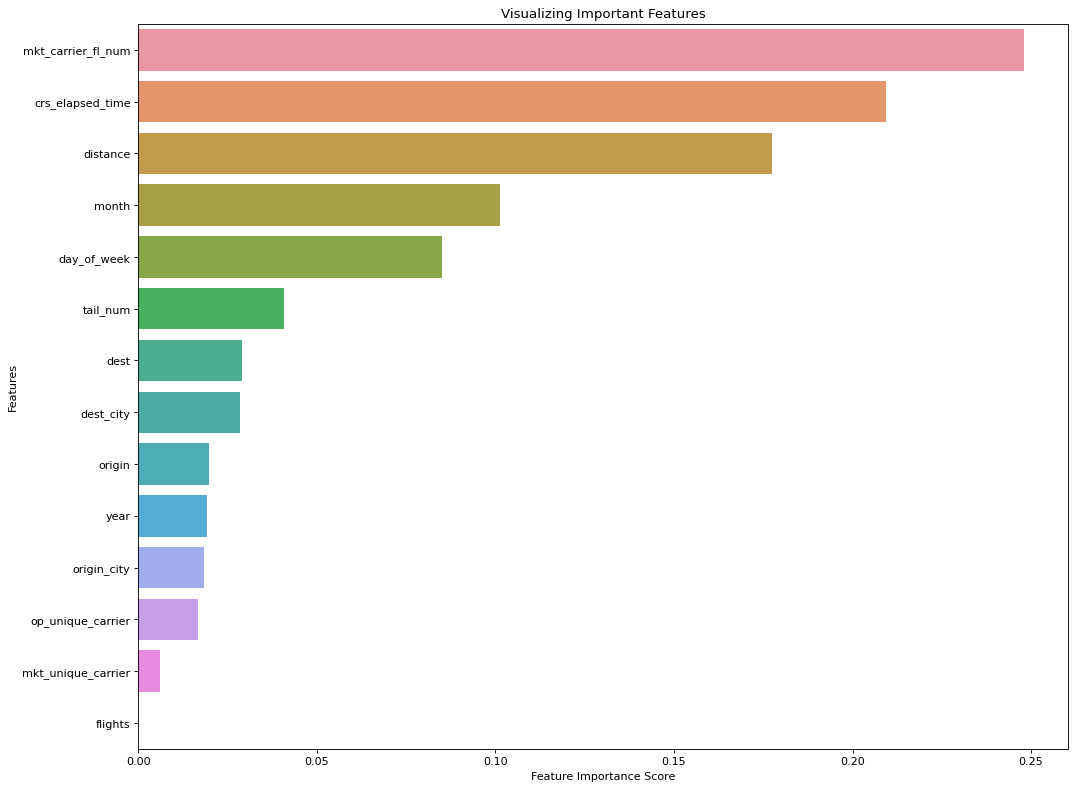



--- 122.32455778121948 seconds ---


In [18]:
# start time to measure the time of the program execution
start_time = time.time()

# Assign X & y
X4 = scaled_no_dummy.iloc[:, :14]
y4 = scaled_no_dummy.iloc[:, 14]

# split data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X4, y4, test_size = 0.20, random_state = 42)

# create the classifier with n_estimators = 100
clf1 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf1.fit(X_train1, y_train1)

# view the feature scores
feature_scores1 = pd.Series(clf1.feature_importances_, 
                           index=X_train1.columns).sort_values(ascending=False)

feature_scores1

# Creating a seaborn bar plot
figure(figsize=(15, 12), dpi=80)
sns.barplot(x=feature_scores1, y=feature_scores1.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

In [19]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Random Forest Model
rf2 = RandomForestClassifier()
rf2.fit(X_train1, y_train1)
y_pred_rf2 = rf2.predict(X_test1)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

RandomForestClassifier()



--- 134.13099575042725 seconds ---


In [22]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Logistic Regression Model
lg2 = LogisticRegression(random_state=0)
lg2.fit(X_train1, y_train1)
y_pred_lg2 = lg2.predict(X_test1)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

LogisticRegression(random_state=0)



--- 5.114914894104004 seconds ---


In [23]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Guasian Naive Bays Model
gnb2 = GaussianNB()
gnb2.fit(X_train1, y_train1)
y_pred_gnb2 = gnb2.predict(X_test1)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

GaussianNB()



--- 0.25831174850463867 seconds ---


In [24]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Decision Tree
dt2 = DecisionTreeClassifier()
dt2.fit(X_train1, y_train1)
y_pred_dt2 = dt2.predict(X_test1)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

DecisionTreeClassifier()



--- 5.715975046157837 seconds ---


In [25]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Stochastic Gradient Classifier
sgd2 = SGDClassifier()
sgd2.fit(X_train1, y_train1)
y_pred_sgd2 = sgd2.predict(X_test1)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

SGDClassifier()



--- 56.37745499610901 seconds ---


In [26]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit XGBoost Classifier
xgb2 = XGBClassifier()
xgb2.fit(X_train1, y_train1)
y_pred_xgb2 = xgb2.predict(X_test1)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

XGBClassifier()



--- 31.801268577575684 seconds ---


In [27]:
# start time to measure the time of the program execution
start_time = time.time()

# Check performance metrics - scores
classification_metrics(y_test1, y_pred_rf2, y_pred_lg2, y_pred_gnb2, 
                           y_pred_dt2, y_pred_sgd2, y_pred_xgb2)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,RF,LogisticR,GNB,DecisionT,SGD,XGB
accuracy,0.553972,0.525692,0.525404,0.527689,0.500331,0.554174
f1_score,0.553972,0.525692,0.525404,0.527689,0.500331,0.554174
precision,0.553972,0.525692,0.525404,0.527689,0.500331,0.554174
recall,0.553972,0.525692,0.525404,0.527689,0.500331,0.554174




--- 1.1234393119812012 seconds ---
